<a href="https://colab.research.google.com/github/NP-15/Deep-Learning/blob/main/Lab01-Binary-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Lab-1
### Binary Classification

#### Original

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [16]:
 # Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier manipulation
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = y

# Only keep classes 0 (Setosa) and 1 (Versicolor)
data = data[data['target'] != 2]

# Display the first few rows of the dataset
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         100.000000        100.000000         100.000000   
mean            5.471000          3.099000           2.861000   
std             0.641698          0.478739           1.449549   
min             4.300000          2.000000           1.000000   
25%             5.000000          2.800000           1.500000   
50%             5.400000          3.050000           2.450000   
75%             5.900000          3.400000           4.325000   
max             7.000000          4.400000           5.100000   

       petal width (cm)      target  
count        100.000000  100.000000  
mean           0.786000    0.500000  
std            0.565153    0.502519  
min            0.100000    0.000000  
25%            0.200000    0.000000  
50%            0.800000    0.500000  
75%            1.300000    1.000000  
max            1.800000    1.000000  
target
0    50
1    50
Name: count, dtype: int64


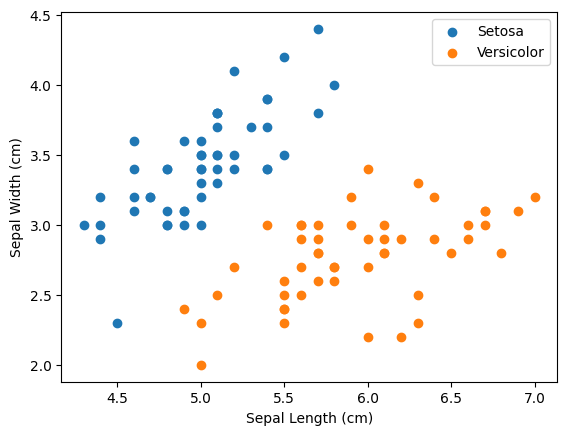

In [17]:
# Summary statistics
print(data.describe())

# Class distribution
print(data['target'].value_counts())

# Visualize the data
plt.scatter(data[data['target'] == 0]['sepal length (cm)'], data[data['target'] == 0]['sepal width (cm)'], label='Setosa')
plt.scatter(data[data['target'] == 1]['sepal length (cm)'], data[data['target'] == 1]['sepal width (cm)'], label='Versicolor')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

In [18]:
# Split the data into features and target variable
X = data.drop('target', axis=1).values
y = data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Initialize and train the Perceptron model
perceptron = Perceptron(max_iter=40, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)

# Exercise 2: DIfferent hyperparameter values
perceptron2 = Perceptron(max_iter=10, eta0=0.2, random_state=42)
perceptron2.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:


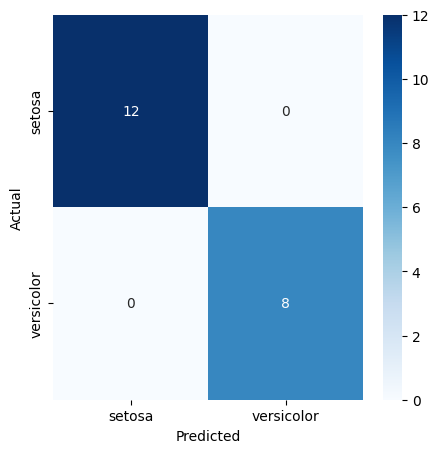

In [24]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names[:2], yticklabels=iris.target_names[:2])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Coefficients: [[ 0.56214556 -0.35288568]]
Model Intercept: [0.2]


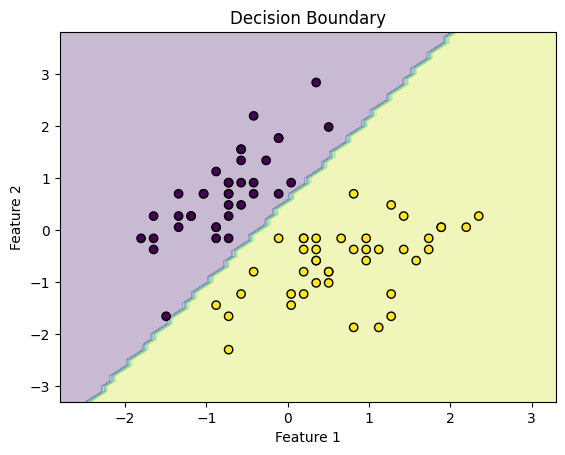

In [25]:
# Printing parameters
print("Model Coefficients:", perceptron.coef_)
print("Model Intercept:", perceptron.intercept_)

# Visualize decision boundary (only for the first two features)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k',
marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

#### Exercise-1: Using different features

In [40]:
 # Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier manipulation
data = pd.DataFrame(X, columns=iris.feature_names)
data = data.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 'columns')
data['target'] = y

# Only keep classes 0 (Setosa) and 1 (Versicolor)
data = data[data['target'] != 2]

# Display the first few rows of the dataset
print(data.head())

   petal length (cm)  petal width (cm)  target
0                1.4               0.2       0
1                1.4               0.2       0
2                1.3               0.2       0
3                1.5               0.2       0
4                1.4               0.2       0


In [41]:
# Split the data into features and target variable
X = data.drop('target', axis=1).values
y = data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# Initialize and train the Perceptron model
perceptron = Perceptron(max_iter=40, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:


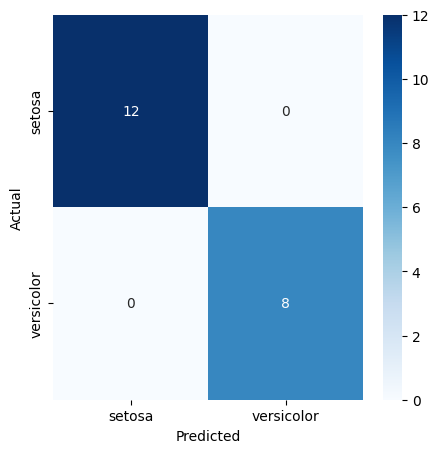

In [43]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names[:2], yticklabels=iris.target_names[:2])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Exercise 2: Different Hyperparameter values

In [45]:
# Make predictions
y_pred = perceptron2.predict(X_test)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:


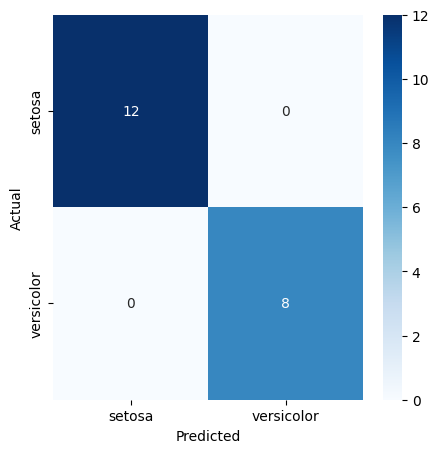

In [46]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names[:2], yticklabels=iris.target_names[:2])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Multi-Layer Perceptron

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

!pip install ucimlrepo

In [62]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [66]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X)
df['target'] = y
# Display the first few rows of the dataset

df['mean radius'] = (df['radius1'] + df['radius2'] + df['radius3']) / 3
df['mean texture'] = (df['texture1'] + df['texture2'] + df['texture3']) / 3
df['mean perimeter'] = (df['perimeter1'] + df['perimeter2'] + df['perimeter3']) / 3
df['mean area'] = (df['area1'] + df['area2'] + df['area3']) / 3
df['mean smoothness'] = (df['smoothness1'] + df['smoothness2'] + df['smoothness3']) / 3

df = df.drop(['radius1', 'radius2', 'radius3', 'texture1', 'texture2', 'texture3', 'perimeter1', 'perimeter2', 'perimeter3', 'area1', 'area2', 'area3', 'smoothness1', 'smoothness2', \
              'smoothness3','compactness1', 'compactness2', 'compactness3', 'concavity1', 'concavity2', 'concavity3', 'concave_points1', 'concave_points2', 'concave_points3', 'symmetry1', \
              'symmetry2', 'symmetry3', 'fractal_dimension1', 'fractal_dimension2', 'fractal_dimension3'], axis='columns')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target           569 non-null    object 
 1   mean radius      569 non-null    float64
 2   mean texture     569 non-null    float64
 3   mean perimeter   569 non-null    float64
 4   mean area        569 non-null    float64
 5   mean smoothness  569 non-null    float64
dtypes: float64(5), object(1)
memory usage: 26.8+ KB
None


       mean radius  mean texture  mean perimeter    mean area  mean smoothness
count   569.000000    569.000000      569.000000   569.000000       569.000000
mean     10.267218     15.394575       67.365435   525.269770         0.078590
std       2.830934      3.486592       19.647999   316.599021         0.012095
min       5.045033      7.378800       31.917667   112.844333         0.047461
25%       8.354500     12.754333       54.030333   319.813333         0.070515
50%       9.567567     15.175000       62.294333   422.976667         0.078969
75%      11.692433     17.540767       77.393000   627.163333         0.085913
max      22.002333     28.335367      152.250000  2432.400000         0.121241
target
B    357
M    212
Name: count, dtype: int64


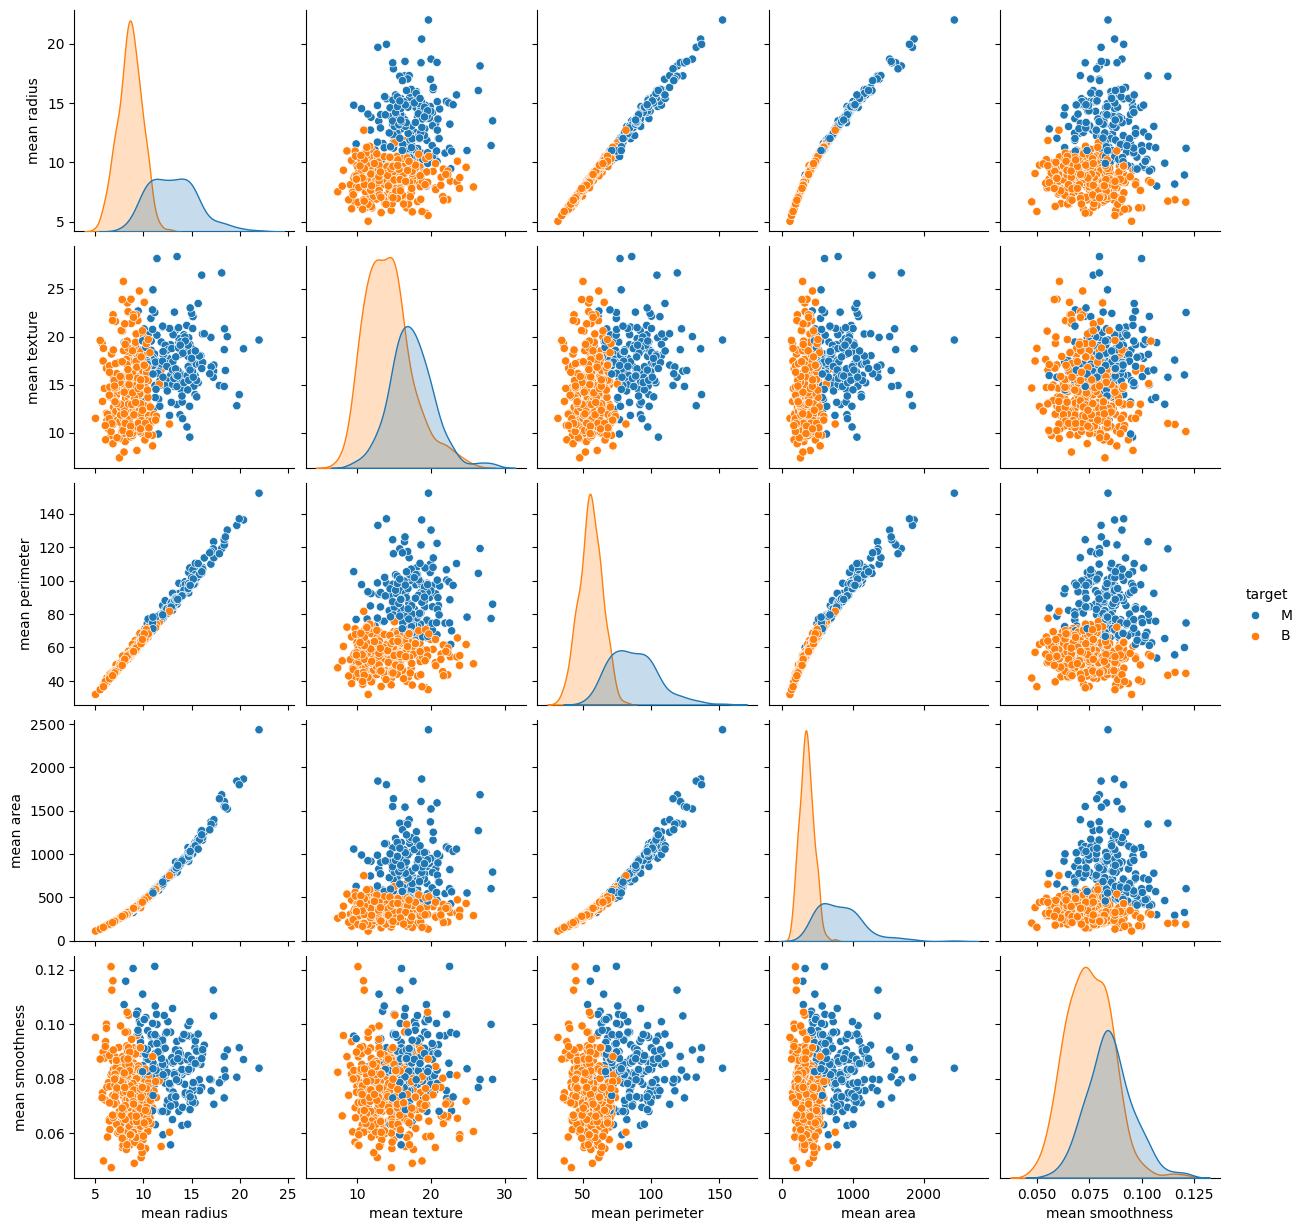

In [67]:
# Summary statistics
print(df.describe())
# Class distribution
print(df['target'].value_counts())
# Visualize pairplot for first few features
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']], hue='target')
plt.show()

In [68]:
# Split the data into features and target variable
X = df.drop('target', axis=1).values
y = df['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
# Initialize and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.0001, solver='adam', random_state=42, verbose=True)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

Iteration 1, loss = 0.63427241
Iteration 2, loss = 0.59652841
Iteration 3, loss = 0.56114317
Iteration 4, loss = 0.52854436
Iteration 5, loss = 0.49840104
Iteration 6, loss = 0.46985130
Iteration 7, loss = 0.44397476
Iteration 8, loss = 0.42005391
Iteration 9, loss = 0.39778961
Iteration 10, loss = 0.37762201
Iteration 11, loss = 0.35861465
Iteration 12, loss = 0.34107324
Iteration 13, loss = 0.32509149
Iteration 14, loss = 0.31032961
Iteration 15, loss = 0.29643792
Iteration 16, loss = 0.28374628
Iteration 17, loss = 0.27218112
Iteration 18, loss = 0.26124404
Iteration 19, loss = 0.25115094
Iteration 20, loss = 0.24193489
Iteration 21, loss = 0.23327150
Iteration 22, loss = 0.22533860
Iteration 23, loss = 0.21775841
Iteration 24, loss = 0.21094566
Iteration 25, loss = 0.20440596
Iteration 26, loss = 0.19836063
Iteration 27, loss = 0.19285013
Iteration 28, loss = 0.18757033
Iteration 29, loss = 0.18261254
Iteration 30, loss = 0.17797388
Iteration 31, loss = 0.17374768
Iteration 32, los

In [71]:
print(list(df.columns))

['target', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']


Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        71
           M       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:


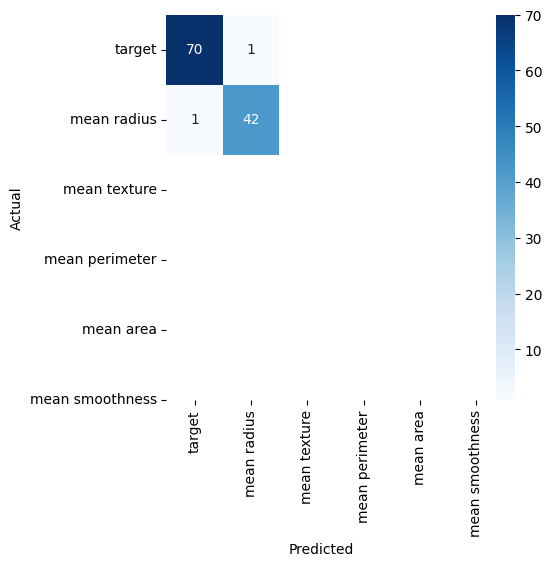

In [73]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=list(df.columns), yticklabels=list(df.columns))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()